Using basic libraries for calculation, data and modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from pyspark.sql import SparkSession 

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()


Check current folder, get updated files if available.

In [2]:
# !pwd
# !wget -N ASd://gitlab.com/dzwietering/corona/-/raw/master/zzprogress.csv
# !wget -N https://www.acaps.org/sites/acaps/files/resources/files/acaps_covid19_government_measures_dataset_0.xlsx
# !pwd    

Read the generated country progress file, read the proper columns as dates.

In [3]:
df_prog = pd.read_csv('zzprogress.csv', parse_dates=[8, 9, 10])
df_prog

,iso2,cname,iso3,ccont,popdata,rsquared,progress,final,start,peak,floor,beta,mu,maxcur
0,AD,Andorra,AND,Europe,76177.0,0.405009,0.292502,2.922351e+03,2020-01-24,2020-05-11,2021-04-09,50.031088,132.358777,299.932303
1,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,6.055558e+04,2020-03-16,2020-05-18,2020-11-02,31.885092,139.117348,9703.833759
2,AF,Afghanistan,AFG,Asia,38041757.0,0.776529,0.504971,6.303103e+04,2020-04-10,2020-06-23,2020-11-30,44.580351,174.835763,7253.463321
3,AL,Albania,ALB,Europe,2862427.0,0.277279,0.364515,7.013855e+03,2020-03-03,2020-07-06,2021-03-28,76.985748,187.528946,472.859199
4,AM,Armenia,ARM,Europe,2957728.0,0.366437,0.014079,1.346352e+06,2020-02-26,2021-01-23,NaT,139.939784,389.394607,68107.927888
5,AT,Austria,AUT,Europe,8858775.0,0.990413,1.134533,1.570162e+04,2020-03-13,2020-03-29,2020-05-12,8.252807,88.659540,8765.056332
6,AU,Australia,AUS,Oceania,25203200.0,0.350105,0.399311,1.983406e+04,2020-02-19,2020-04-14,2020-08-02,36.468181,104.639337,2783.994682
7,AW,Aruba,ABW,America,106310.0,0.859679,1.940997,5.306552e+01,2020-03-29,2020-04-09,2020-05-07,6.277573,99.992380,36.207990
8,BA,Bosnia_and_Herzegovina,BIH,Europe,3300998.0,0.366677,0.437718,1.014758e+04,2020-02-22,2020-06-11,2021-02-15,64.569936,163.117233,809.864710
9,BB,Barbados,BRB,America,287021.0,0.688520,0.710262,1.365694e+02,2020-03-06,2020-04-11,2020-06-21,24.078193,101.911759,28.807400


Have a look at the countries with the highest estimated part of the population concurrently infected. Therefore, we divide the maximum current from the estimate by the population data. We use a log scale due to large differences and show countries with values above 1 per thousand.

In [4]:
df_prog['mcpop'] = df_prog['maxcur'] / df_prog['popdata']
## Calculate the mcpopuplation per thousand. 
df_progshow = df_prog[df_prog['mcpop'] > 1/1000].sort_values(by=['mcpop'])
df_progshow

,iso2,cname,iso3,ccont,popdata,rsquared,progress,final,start,peak,floor,beta,mu,maxcur,mcpop
136,RU,Russia,RUS,Europe,145872260.0,0.980925,0.772697,8.469095e+05,2020-03-28,2020-05-25,2020-10-28,29.430769,146.103937,146829.948621,0.001007
112,MV,Maldives,MDV,Asia,530957.0,0.867354,0.866063,2.750378e+03,2020-03-31,2020-05-18,2020-09-28,24.671386,139.402536,566.581456,0.001067
142,SG,Singapore,SGP,Asia,5804343.0,0.739169,0.834456,5.287233e+04,2020-02-27,2020-05-20,2020-12-30,41.621119,140.554847,6512.274830,0.001122
164,UK,United_Kingdom,GBR,Europe,66647112.0,0.986508,0.979934,3.199020e+05,2020-03-12,2020-04-23,2020-08-17,21.294705,113.999117,76010.370985,0.001140
78,IT,Italy,ITA,Europe,60359546.0,0.989891,0.991791,2.427528e+05,2020-02-28,2020-04-01,2020-07-04,17.085021,92.484727,71177.390180,0.001179
79,JE,Jersey,JEY,Europe,107796.0,0.850194,0.971570,3.283344e+02,2020-03-15,2020-04-08,2020-06-15,12.305162,98.993702,130.452104,0.001210
141,SE,Sweden,SWE,Europe,10230185.0,0.802043,0.542392,1.284092e+05,2020-02-22,2020-06-07,2021-03-24,52.984713,158.960667,12453.349180,0.001217
109,MS,Montserrat,MSF,America,4991.0,0.354553,0.802430,1.370836e+01,2020-03-21,2020-04-10,2020-06-06,10.125194,100.858733,6.464036,0.001295
93,LI,Liechtenstein,LIE,Europe,38378.0,0.906384,1.007193,8.240727e+01,2020-03-11,2020-03-25,2020-05-04,6.915262,84.525142,52.584872,0.001370
138,SA,Saudi_Arabia,SAU,Asia,34268529.0,0.872429,0.387767,5.002959e+05,2020-03-18,2020-07-05,2021-05-02,53.688860,186.996146,47912.896292,0.001398


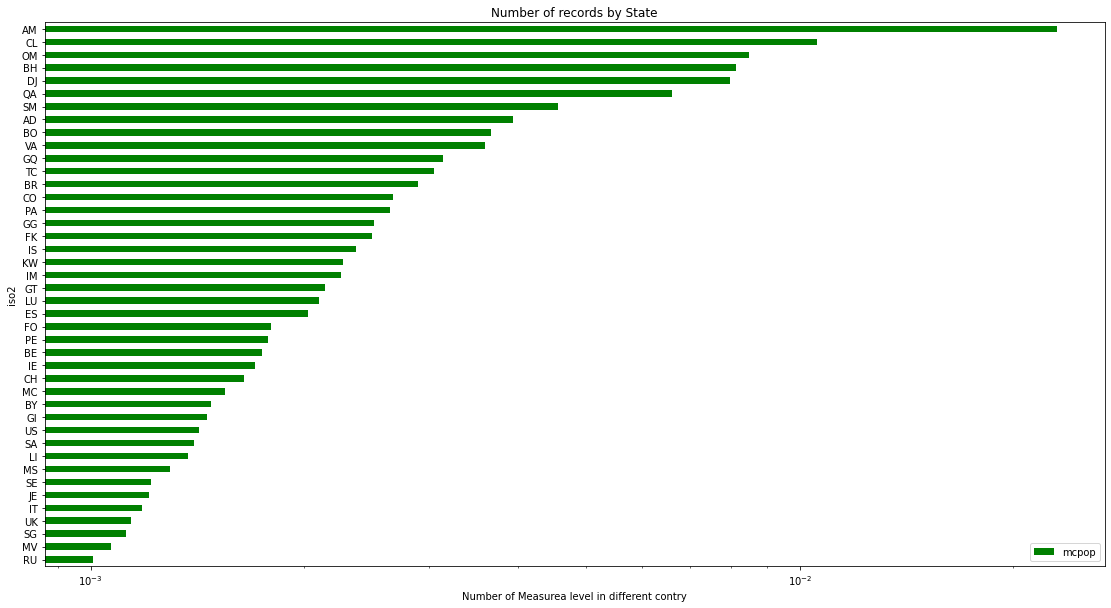

In [5]:
# Creating distribution
x = 'iso2'
y = 'mcpop'
# Set color 
my_colors = 'Green'
# axs.hist(x, bins = n_bins)
fig = df_progshow.plot(
    x, y, kind='barh', logx=True, figsize=(19, 10), grid=False, color=my_colors, label='mcpop', )
    
## Creating name
plt.xlabel('Number of Measurea level in different contry')
plt.title('Number of records by State')

plt.show()


The log of infected seems a good initial measure, so we define it as target.

In [6]:
df_prog['target'] = np.log10(df_prog['mcpop'])
df_prog['target'].describe()
#make the normal target for the 

count    176.000000
mean      -3.529878
std        0.684149
min       -4.807437
25%       -4.104853
50%       -3.541673
75%       -3.013171
max       -1.637761
Name: target, dtype: float64

For looking at country behavior we try the ACAPS government measures dataset.

In [7]:
df_meas = pd.read_excel('acaps_covid19_government_measures_dataset_0.xlsx', sheet_name='Dataset')
df_meas

# df_meas = pd.read_excel('acaps_covid19_government_measures_dataset_0.xlsx', sheet_name='Data')
# df_meas

,ID,ISO,COUNTRY,REGION,ADMIN_LEVEL_NAME,PCODE,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,4245,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Awareness campaigns,NaN,MoPH begins announcements on their facebook to...,NaN,2020-01-24,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1005130...,2020-04-07,NaN
1,4246,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,checked,Health teams at airports will check passengers...,NaN,2020-01-26,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1006458...,2020-04-07,NaN
2,4247,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,International flights suspension,checked,Flights to China are suspended.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
3,4248,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,NaN,Health screenings of all passengers at airports.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
4,23,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,Border checks,checked,All China and Iran nationals,NaN,2020-02-01,US Embassy,Government,https://af.usembassy.gov/covid-19-information/,2020-03-14,NaN
5,4249,AFG,Afghanistan,Asia,Kabul,NaN,Introduction / extension of measures,Public health measures,Strengthening the public health system,checked,the ministry has prepared 100 bed to control t...,NaN,2020-02-02,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1011701...,2020-04-07,NaN
6,4250,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,NaN,NaN,NaN,2020-02-02,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1011701...,2020-04-07,NaN
7,4252,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Strengthening the public health system,NaN,The Ministry of public health has created the ...,NaN,2020-02-04,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1013057...,2020-04-07,NaN
8,4251,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Awareness campaigns,NaN,"Print, publishing and sending advertising mate...",NaN,2020-02-04,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1013023...,2020-04-07,NaN
9,4253,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,checked,"review list of equipment, medical requirements...",NaN,2020-02-06,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1014455...,2020-04-07,NaN


The dataset contains both start and end of measures, so let's see how they are coded.

In [8]:
print(df_meas['LOG_TYPE'].unique())
df_meas = df_meas[df_meas['LOG_TYPE'] == 'Introduction / extension of measures']
df_meas

['Introduction / extension of measures' 'Phase-out measure']


,ID,ISO,COUNTRY,REGION,ADMIN_LEVEL_NAME,PCODE,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,4245,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Awareness campaigns,NaN,MoPH begins announcements on their facebook to...,NaN,2020-01-24,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1005130...,2020-04-07,NaN
1,4246,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,checked,Health teams at airports will check passengers...,NaN,2020-01-26,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1006458...,2020-04-07,NaN
2,4247,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,International flights suspension,checked,Flights to China are suspended.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
3,4248,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,NaN,Health screenings of all passengers at airports.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
4,23,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,Border checks,checked,All China and Iran nationals,NaN,2020-02-01,US Embassy,Government,https://af.usembassy.gov/covid-19-information/,2020-03-14,NaN
5,4249,AFG,Afghanistan,Asia,Kabul,NaN,Introduction / extension of measures,Public health measures,Strengthening the public health system,checked,the ministry has prepared 100 bed to control t...,NaN,2020-02-02,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1011701...,2020-04-07,NaN
6,4250,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,NaN,NaN,NaN,2020-02-02,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1011701...,2020-04-07,NaN
7,4252,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Strengthening the public health system,NaN,The Ministry of public health has created the ...,NaN,2020-02-04,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1013057...,2020-04-07,NaN
8,4251,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Awareness campaigns,NaN,"Print, publishing and sending advertising mate...",NaN,2020-02-04,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1013023...,2020-04-07,NaN
9,4253,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,checked,"review list of equipment, medical requirements...",NaN,2020-02-06,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1014455...,2020-04-07,NaN


Both datasets contain the three character ISO country code, so we join on those columns.
left join on ISO3 and right in ISO. 

In [9]:
df_full = pd.merge(df_prog, df_meas, left_on='iso3', right_on='ISO')
df_full


,iso2,cname,iso3,ccont,popdata,rsquared,progress,final,start,peak,...,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Visa restrictions,checked,entry ban for travellers from Iran (no governm...,NaN,2020-01-02,Reuters,Media,https://www.reuters.com/article/us-healthcare-...,2020-03-16,NaN
1,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Health screenings in airports and border cross...,checked,passengers arriving from China will undergo he...,NaN,2020-01-23,KhaleejTimes,Media,https://www.khaleejtimes.com/uae/dubai/china-c...,2020-03-16,NaN
2,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Schools closure,NaN,schools will be closed for 4 weeks,NaN,2020-03-08,US Embassy,Government,https://ae.usembassy.gov/covid-19-information/,2020-03-16,NaN
3,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Isolation and quarantine policies,checked,Introduction of quarantine policiesfor guests ...,NaN,2020-03-08,US Embassy,Government,https://ae.usembassy.gov/covid-19-information/,2020-03-16,NaN
4,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Health screenings in airports and border cross...,NaN,health sreenings for all passengers arriving,NaN,2020-03-08,US Embassy,Government,https://ae.usembassy.gov/covid-19-information/,2020-03-16,NaN
5,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Limit public gatherings,NaN,"suspension of wedding venues, fitness clubs, c...",NaN,2020-03-16,Emirates News Agency,Media,https://www.wam.ae/en/details/1395302831132,2020-03-16,NaN
6,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,International flights suspension,checked,flights to and from Iran and China are suspend...,NaN,2020-03-17,Ministry of Foreign Affairs,Government,https://www.mofaic.gov.ae/en/mediahub/news/202...,2020-03-16,NaN
7,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Visa restrictions,NaN,suspension of visa issuance starting March 17,NaN,2020-03-17,NYT,Media,https://www.nytimes.com/reuters/2020/03/14/wor...,2020-03-16,NaN
8,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Isolation and quarantine policies,checked,14 day Quarantine for all enetering,NaN,2020-03-18,International SOS,Other organisations,https://pandemic.internationalsos.com/2019-nco...,2020-03-22,NaN
9,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,International flights suspension,checked,"Bahrain, Iraq, Iran, Itlay (except rome) Saudi...",NaN,2020-03-18,International SOS,Other organisations,https://pandemic.internationalsos.com/2019-nco...,2020-03-22,NaN


The first analysis could be how early measures were implemented, so we calculate the difference between the implemented date and our estimated start date in days.

In [10]:
df_full['days'] = (df_full['DATE_IMPLEMENTED'] - df_full['start']).dt.days
df_full['days'].describe()

count    15990.00000
mean        83.80469
std         91.11521
min       -153.00000
25%         13.00000
50%         58.00000
75%        158.00000
max        325.00000
Name: days, dtype: float64

To reduce this to a source dataset for modeling, we filter on introduction of measures and pivot to columns with the average number of days for categories, indexed by country code.

In [11]:
df_aggr = df_full.pivot_table(index='iso2', columns='CATEGORY', values='days')
df_aggr

CATEGORY,Governance and socio-economic measures,Humanitarian exemption,Lockdown,Movement restrictions,Public health measures,Social distancing
iso2,,,,,,
AE,8.000000,NaN,20.500000,50.400000,50.375000,23.500000
AF,-45.800000,NaN,-13.000000,-45.375000,-26.514286,-27.333333
AL,39.470588,NaN,35.500000,78.352941,96.300000,131.250000
AM,110.000000,NaN,38.000000,43.250000,79.307692,86.142857
AT,77.288462,NaN,129.166667,64.612903,119.808219,148.000000
AU,144.163265,NaN,156.375000,134.168831,136.894737,106.264151
BA,72.782609,NaN,61.500000,54.923077,91.076923,89.222222
BB,105.395349,NaN,81.700000,100.518519,83.092308,30.347826
BD,-9.833333,NaN,3.250000,9.894737,50.454545,74.666667


The final dataset contains this data combined with our estimates.

In [12]:
df_final = pd.merge(df_prog, df_aggr, left_on='iso2', right_index=True)
df_final.reset_index(drop=True, inplace=True)
df_final

,iso2,cname,iso3,ccont,popdata,rsquared,progress,final,start,peak,...,mu,maxcur,mcpop,target,Governance and socio-economic measures,Humanitarian exemption,Lockdown,Movement restrictions,Public health measures,Social distancing
0,AE,United_Arab_Emirates,ARE,Asia,9.770526e+06,0.970967,0.810311,6.055558e+04,2020-03-16,2020-05-18,...,139.117348,9703.833759,0.000993,-3.002975,8.000000,NaN,20.500000,50.400000,50.375000,23.500000
1,AF,Afghanistan,AFG,Asia,3.804176e+07,0.776529,0.504971,6.303103e+04,2020-04-10,2020-06-23,...,174.835763,7253.463321,0.000191,-3.719715,-45.800000,NaN,-13.000000,-45.375000,-26.514286,-27.333333
2,AL,Albania,ALB,Europe,2.862427e+06,0.277279,0.364515,7.013855e+03,2020-03-03,2020-07-06,...,187.528946,472.859199,0.000165,-3.782003,39.470588,NaN,35.500000,78.352941,96.300000,131.250000
3,AM,Armenia,ARM,Europe,2.957728e+06,0.366437,0.014079,1.346352e+06,2020-02-26,2021-01-23,...,389.394607,68107.927888,0.023027,-1.637761,110.000000,NaN,38.000000,43.250000,79.307692,86.142857
4,AT,Austria,AUT,Europe,8.858775e+06,0.990413,1.134533,1.570162e+04,2020-03-13,2020-03-29,...,88.659540,8765.056332,0.000989,-3.004619,77.288462,NaN,129.166667,64.612903,119.808219,148.000000
5,AU,Australia,AUS,Oceania,2.520320e+07,0.350105,0.399311,1.983406e+04,2020-02-19,2020-04-14,...,104.639337,2783.994682,0.000110,-3.956787,144.163265,NaN,156.375000,134.168831,136.894737,106.264151
6,BA,Bosnia_and_Herzegovina,BIH,Europe,3.300998e+06,0.366677,0.437718,1.014758e+04,2020-02-22,2020-06-11,...,163.117233,809.864710,0.000245,-3.610233,72.782609,NaN,61.500000,54.923077,91.076923,89.222222
7,BB,Barbados,BRB,America,2.870210e+05,0.688520,0.710262,1.365694e+02,2020-03-06,2020-04-11,...,101.911759,28.807400,0.000100,-3.998410,105.395349,NaN,81.700000,100.518519,83.092308,30.347826
8,BD,Bangladesh,BGD,Asia,1.630462e+08,0.943872,0.209090,7.116205e+05,2020-04-17,2020-07-31,...,213.488829,62977.098763,0.000386,-3.413128,-9.833333,NaN,3.250000,9.894737,50.454545,74.666667
9,BE,Belgium,BEL,Europe,1.145552e+07,0.985602,1.043681,5.901994e+04,2020-03-08,2020-04-07,...,98.000510,19986.798608,0.001745,-2.758272,68.062500,NaN,95.666667,108.461538,97.904762,166.023256


Just a quick check on data, for example the relation between beta (the Gumbel curve width parameter) and the target column.

Text(0.5, 1.0, ' Gumbel curve width parameter')

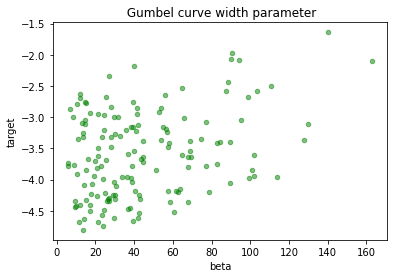

In [13]:
df_final.plot(kind="scatter", x="beta", y="target", alpha=1/2, color='green')

plt.title(' Gumbel curve width parameter')


If we start using this model for predictions, we need to split the dataset. For now we are still exploring so we use all the data for analysis. The feature columns are all the columns added to the right of our dataset with estimations.

In [14]:
from sklearn.model_selection import train_test_split

featcols = len(df_prog.columns)
features = df_final.columns[featcols:]

x_trn, x_tst, y_trn, y_tst = train_test_split(df_final[features], df_final['mcpop'])

x_trn = df_final[features]
y_trn = df_final['target']

In [15]:
# !pip install xgboost

Create the XGBoost data structure for training and check parameters to prevent overfitting on this small dataset. Then check the error rate between the test and train data used internally by XGBoost. If the test error rate is much higher, we are overfitting.

<AxesSubplot:>

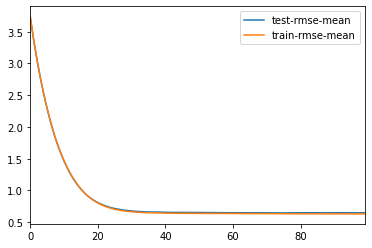

In [16]:
import xgboost as xgb

dtrn = xgb.DMatrix(x_trn, label=y_trn)
#dtst = xgb.DMatrix(x_tst)

## Apply the xgb.Dmatrix to know the value. 
## Why Xgboost is the best for this one ? Error identified this method is better other methos. 
params = {
    #'objective':'reg:squarederror',
    'eta':1/10,
    'gamma':5,
    #'min_child_weight':10,
    #'tree_method':'hist',
    #'seed':0,
    #'max_depth':3,
    'colsample_bytree':0.7,
    'subsample':0.7,
}

hist = xgb.cv(params, dtrn, nfold=10, as_pandas=True, num_boost_round=100, verbose_eval=10, early_stopping_rounds=1000, show_stdv=True, seed=0)
hist.plot(y=["test-rmse-mean", "train-rmse-mean"])

When we train with xgsboost it brought the best opportunity for high good fitting

In [17]:
x_tst.fillna(x_trn.mean(), inplace=True)

x_tst._is_view


False

In [18]:
import xgboost as xgb

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

import xgboost as xgb


clf_gbm = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=500)
clf_gbm.fit(x_trn, y_trn)

# Calculate the predictions on the test set
pred = clf_gbm.predict(x_tst)

# Evaluate the performance based on the accuracy
acc = accuracy_score(y_test, pred)

print('Accuracy: {:.3f}'.format(acc))

# # Get and show the Confusion Matrix
# cm = confusion_matrix(y_test, pred)
# print(cm)

# dtrn = xgb.DMatrix(x_trn, label=y_trn)
# dtst = xgb.DMatrix(x_tst)

# ## Apply the xgb.Dmatrix to know the value. 
# ## Why Xgboost is the best for this one ? Error identified this method is better other methos. 
# params = {
#     #'objective':'reg:squarederror',
#     'eta':1/10,
#     'gamma':5,
#     'min_child_weight':10,
#     'tree_method':'hist',
#     'seed':0,
#     'max_depth':3,
#     'colsample_bytree':0.7,
#     'subsample':0.7,
# }

# hist = xgb.cv(params, dtrn, nfold=10, as_pandas=True, num_boost_round=100, verbose_eval=10, early_stopping_rounds=1000, show_stdv=True, seed=0)

# hist.plot(y=["test-rmse-mean", "train-rmse-mean"])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Train the model using the parameters found above and show the feature importance. Note that this can be both a positive and negative influence. Other as Mr.Herman my teacher from Class recommend me to compare with other dataset. It possible to slow down in here to prevent Doubt issues. 

In [ ]:
bst = xgb.train(params, dtrn, num_boost_round=100, verbose_eval=1)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

xgb.plot_importance(bst, ax=ax, height=1/2)

The actual XGBoost model is an ensemble of decision trees that can be hard to interpret. SHAP is an analysis library that shows the influence of factors based on this model. First we choose a country and see how the estimate relates to measures.

In [ ]:
country = 'NL'
#here we focus on the country of netherland.   

rownum = df_final[df_final['iso2'] == country].index[0]

import shap

shap.initjs()

explainer = shap.TreeExplainer(bst, x_trn)
shap_values = explainer.shap_values(x_trn)

shap.force_plot(explainer.expected_value, shap_values[rownum], x_trn.loc[rownum])

When we take all these plots, rotate and stack them we get a global view of the model.

In [ ]:
shap.force_plot(explainer.expected_value, shap_values, x_trn)

Looking at individual measures we can visualize their impact on model output.

In [ ]:
shap.summary_plot(shap_values, x_trn)

Finally, a similar plot to the importance plot above shows the explanatory value of measures.

In [ ]:
shap.summary_plot(shap_values, x_trn, plot_type="bar")
#Load the shap of average imact on model output. 
#Apply plot type

Seeking for explore adventure AI of analytic with MarkAi Blog. 
* Support Corona Finding the best solution. 

We can see the shap value show that Social distance stay on the peak of 0.07 which mean brought the highe score to bring the good measure during the pandemic. Lo